# Features Selection

### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Loading the data

In [3]:
df = pd.read_csv('../data/v2_Clean.csv')
df.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200.0,2.0,1.0,51.00,2


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 11994 entries, 0 to 11993
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     11994 non-null  str    
 1   availability  11994 non-null  str    
 2   location      11994 non-null  str    
 3   society       7389 non-null   str    
 4   total_sqft    11994 non-null  float64
 5   bath          11994 non-null  float64
 6   balcony       11498 non-null  float64
 7   price         11994 non-null  float64
 8   bhk           11994 non-null  int64  
dtypes: float64(4), int64(1), str(4)
memory usage: 843.5 KB


In [5]:
df.columns

Index(['area_type', 'availability', 'location', 'society', 'total_sqft',
       'bath', 'balcony', 'price', 'bhk'],
      dtype='str')

In [6]:
df.describe()

,total_sqft,bath,balcony,price,bhk
count,11994.000000,11994.000000,11498.000000,11994.000000,11994.000000
mean,1605.386310,2.572370,1.586189,113.273771,2.661497
std,1284.048401,1.090642,0.814386,154.846892,0.988455
min,300.000000,1.000000,0.000000,9.000000,1.000000
25%,1116.000000,2.000000,1.000000,50.000000,2.000000
50%,1305.000000,2.000000,2.000000,70.000000,3.000000
75%,1715.000000,3.000000,2.000000,120.000000,3.000000
max,52272.000000,16.000000,3.000000,3600.000000,16.000000


In [7]:
df.shape

(11994, 9)

### Let's find the Categories columns

In [8]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object' or df[col].dtype == 'str']
cat_cols = list(cat_cols)
cat_cols.sort()

print("Categorical Columns:", cat_cols)

Categorical Columns: ['area_type', 'availability', 'location', 'society']


In [9]:
for col in cat_cols:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

Column: area_type
area_type
Super built-up  Area    8257
Built-up  Area          2315
Plot  Area              1340
Carpet  Area              82
Name: count, dtype: int64


Column: availability
availability
Ready To Move    9430
18-May            287
18-Dec            282
18-Apr            258
18-Aug            186
                 ... 
15-Aug              1
17-Jan              1
16-Nov              1
16-Jan              1
14-Jul              1
Name: count, Length: 80, dtype: int64


Column: location
location
Whitefield                                         519
Sarjapur  Road                                     373
Electronic City                                    279
Kanakpura Road                                     245
Thanisandra                                        227
                                                  ... 
Prasanna layout Herohalli                            1
Sarvobhogam Nagar                                    1
12th cross srinivas nagar banshankari 3rd stag

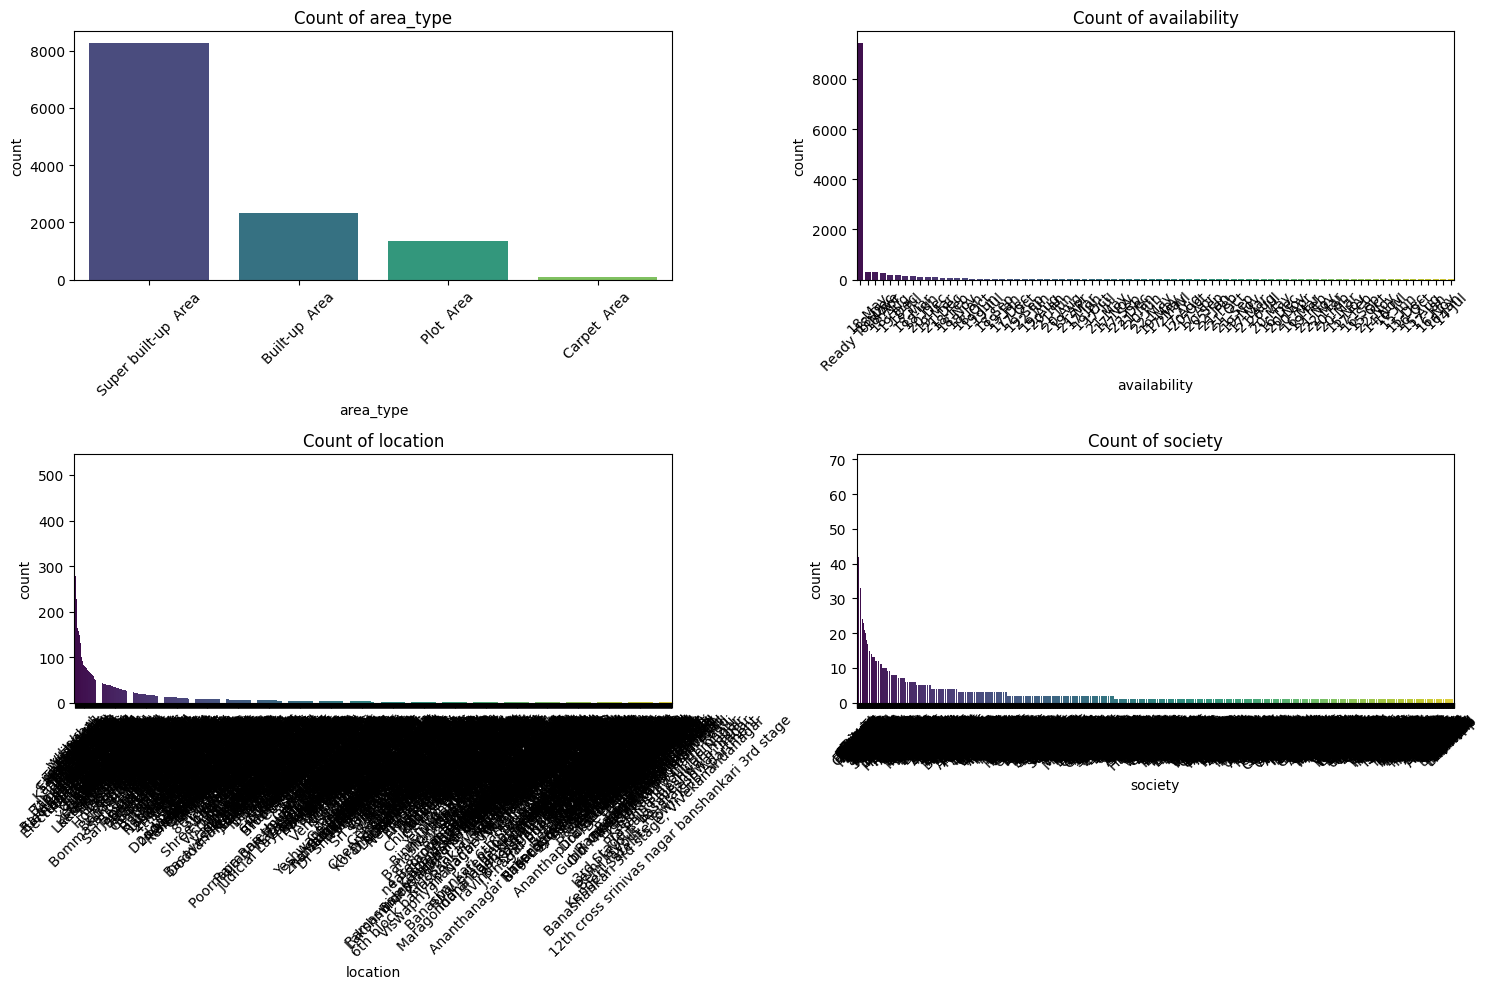

In [33]:
# Visualize Categorical Distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i+1)
    # Sorting by count makes the chart easier to read
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, order=order, palette='viridis')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
df[cat_cols].describe().T

,count,unique,top,freq
area_type,11994,4,Super built-up Area,8257
availability,11994,80,Ready To Move,9430
location,11994,1215,Whitefield,519
society,7389,2659,GrrvaGr,68


In [11]:
df[cat_cols].nunique().sort_values(ascending=False)

society         2659
location        1215
availability      80
area_type          4
dtype: int64

### Let's find the Numeric columns

In [12]:
num_cols = [col for col in df.columns if df[col].dtype != 'object' and df[col].dtype != 'str']
num_cols = list(num_cols)
num_cols.sort()
print("Numerical Columns:", num_cols)

Numerical Columns: ['balcony', 'bath', 'bhk', 'price', 'total_sqft']


In [13]:
for col in num_cols:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

Column: balcony
balcony
2.0    4619
1.0    4461
3.0    1513
0.0     905
Name: count, dtype: int64


Column: bath
bath
2.0     6517
3.0     3057
4.0     1021
1.0      728
5.0      402
6.0      166
7.0       50
8.0       28
9.0       16
12.0       3
10.0       2
13.0       2
14.0       1
16.0       1
Name: count, dtype: int64


Column: bhk
bhk
2     5196
3     4547
4     1241
1      624
5      203
6       91
7       42
8       25
9       15
10       6
11       2
16       1
13       1
Name: count, dtype: int64


Column: price
price
65.00     279
75.00     278
55.00     260
60.00     249
45.00     227
         ... 
96.80       1
63.93       1
40.14       1
231.00      1
488.00      1
Name: count, Length: 1974, dtype: int64


Column: total_sqft
total_sqft
1200.0    635
1100.0    202
2400.0    192
1500.0    186
1000.0    146
         ... 
613.0       1
2395.0      1
2758.0      1
1258.5      1
4689.0      1
Name: count, Length: 1958, dtype: int64




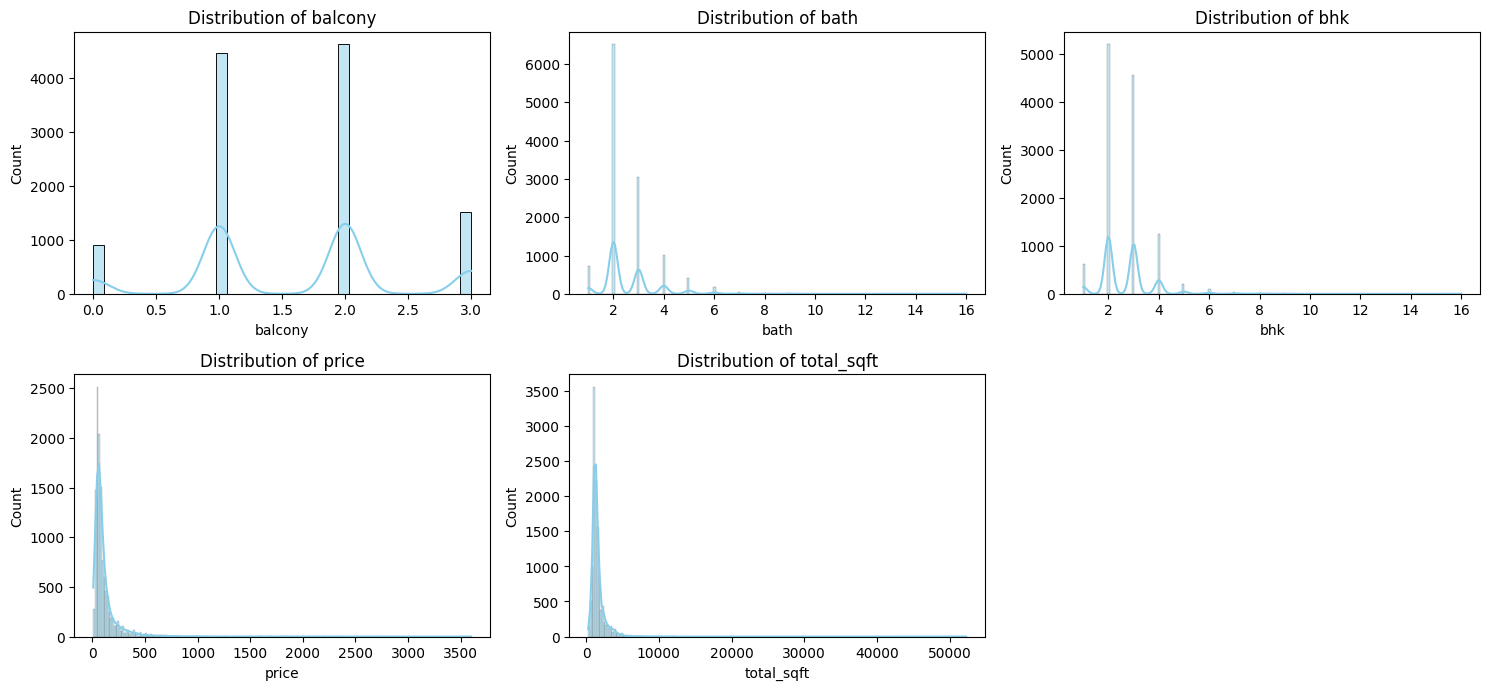

In [14]:
# Visualize Numerical Distributions

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [15]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
balcony,11498.0,1.586189,0.814386,0.0,1.0,2.0,2.0,3.0
bath,11994.0,2.572370,1.090642,1.0,2.0,2.0,3.0,16.0
bhk,11994.0,2.661497,0.988455,1.0,2.0,3.0,3.0,16.0
price,11994.0,113.273771,154.846892,9.0,50.0,70.0,120.0,3600.0
total_sqft,11994.0,1605.386310,1284.048401,300.0,1116.0,1305.0,1715.0,52272.0


In [16]:
df[num_cols].nunique().sort_values(ascending=False)

price         1974
total_sqft    1958
bath            14
bhk             13
balcony          4
dtype: int64

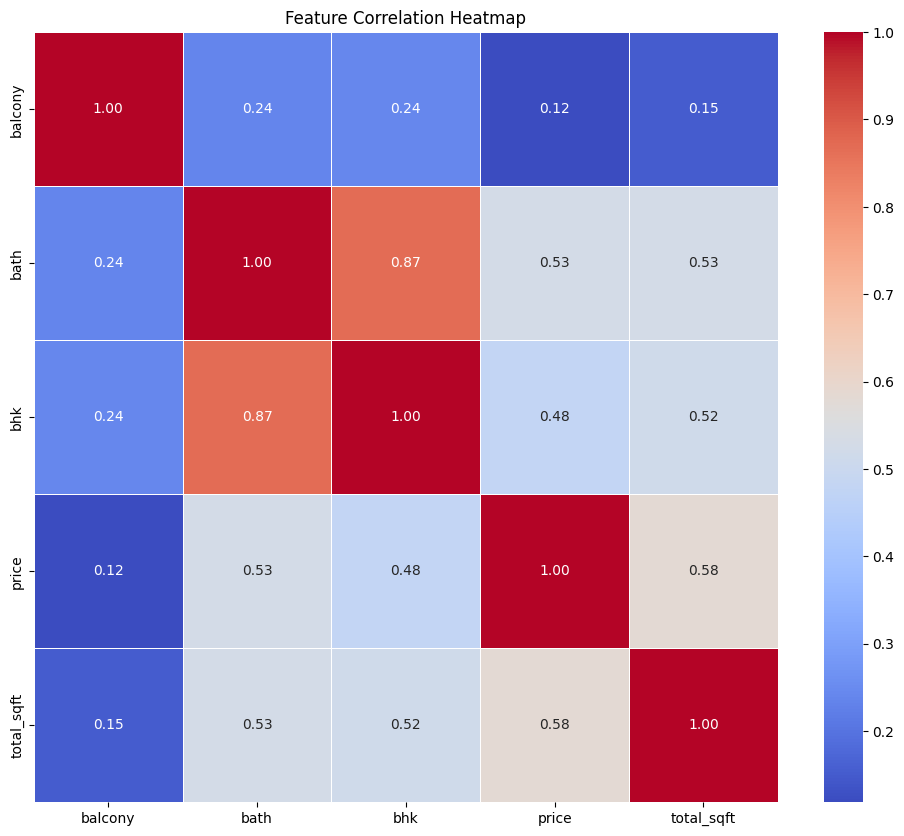

In [17]:
# Calculate the correlation matrix
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [18]:
df.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200.0,2.0,1.0,51.00,2


In [19]:
# List of columns we want to keep
necessary_columns = ['location', 'total_sqft', 'bath', 'price', 'bhk']
df = df[necessary_columns]

In [20]:
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


# Save The FS Data

In [21]:
df.to_csv('../data/v3_Feature_Selection.csv', index=False)

### This is for ```src/components/c_feature_selection.py```

In [22]:
import os
import sys
import pandas as pd
from src.exception import CustomException
from src.logger import configure_logger

# Initialize logger for feature selection
logger = configure_logger("FeatureSelection")

def select_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Selects necessary columns and drops redundant ones based on 
    correlation analysis and missing value checks.
    """
    try:
        logger.info("Starting Feature Selection process...")

        # Define columns to keep based on notebook verification
        # This removes area_type, availability, society, and balcony
        necessary_columns = ['location', 'total_sqft', 'bath', 'price', 'bhk']
        
        # Filter the dataframe
        # This automatically resolves the 5,000+ nulls in 'society' and 'balcony'
        df_selected = df[necessary_columns].copy()

        # Logging the change
        dropped_cols = [col for col in df.columns if col not in necessary_columns]
        
        summary = (
            f"\n{'='*30}\n"
            f"FEATURE SELECTION REPORT\n"
            f"{'='*30}\n"
            f"Columns Kept: {list(df_selected.columns)}\n"
            f"Columns Dropped: {dropped_cols}\n"
            f"Final Shape: {df_selected.shape}\n"
            f"{'='*30}"
        )
        logger.info(summary)

        return df_selected

    except Exception as e:
        logger.error("Error occurred in Feature Selection component")
        raise CustomException(e, sys)